In [1]:
%matplotlib inline  
import struct
from struct import unpack
from numpy import zeros, uint8, float32
from pylab import imshow, show, cm
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#Initialize for keras
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
# Define functions for reading data.
# Based on https://gist.github.com/tylerneylon/
def read_idx(filename):
    """
        Read from file and create numpy array
    """
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

def get_data(image_file, label_file, num_classes = 10):
    """
        Read the image and label data
    """
    # Read the files
    pre_images = read_idx(image_file)
    pre_labels = read_idx(label_file)
    
    images = np.zeros((len(pre_images), 28,28, 1), dtype=np.float32)
    labels = np.zeros((len(pre_labels),num_classes), dtype=np.int8)
    for i in range(len(pre_images)):
        pre_img=pre_images[i]
        pre_label=pre_labels[i]
        img = (pre_img.transpose() / 255.0)
        images[i] = img.reshape(28,28,1) 
        labels[i] = keras.utils.to_categorical(pre_label, num_classes)
    
    return images, labels


In [3]:
image_file = '/home/carnd/data/emnist/emnist-mnist-train-images-idx3-ubyte'
label_file = '/home/carnd/data/emnist/emnist-mnist-train-labels-idx1-ubyte'
num_classes = 10

images, labels = get_data(image_file, label_file)
print ('Images Shape: {}'.format(images.shape))
print ('Labels Shape: {}'.format(labels.shape))

Images Shape: (60000, 28, 28, 1)
Labels Shape: (60000, 10)


Label - 4 : [0 0 0 0 1 0 0 0 0 0] 


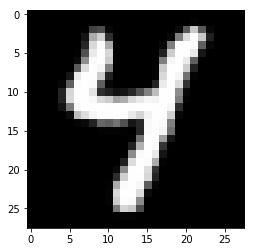

Label - 1 : [0 1 0 0 0 0 0 0 0 0] 


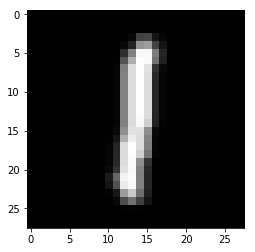

Label - 4 : [0 0 0 0 1 0 0 0 0 0] 


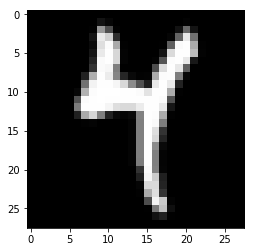

Label - 1 : [0 1 0 0 0 0 0 0 0 0] 


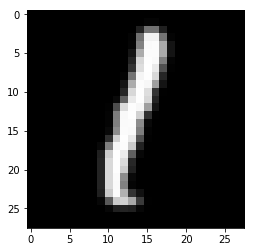

Label - 6 : [0 0 0 0 0 0 1 0 0 0] 


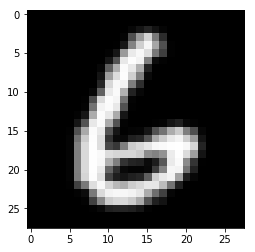

In [4]:
def view_image(image, label=""):
    """View a single image."""
    print("Label - {} : {} ".format(np.argmax(label), label))
    plt.imshow((image.reshape(28,28)), cmap="gray")
    plt.show()

for i in range(5):
    view_image(images[i], labels[i])

In [5]:
# Train, Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [6]:
# Initialize the hyperparameters
input_shape = (28,28, 1)

In [7]:
# Build model
model = Sequential()

#Input size =28x28
model.add(Conv2D(64, kernel_size=(7, 7), strides=(1,1),
                 kernel_initializer='glorot_normal', activation='relu', 
                 input_shape=input_shape, name='conv1'))
model.add(Conv2D(64, kernel_size=(2, 2), strides=(2,2), kernel_initializer='glorot_normal', activation='relu', name='cpool1'))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=(5, 5), strides=(1,1), kernel_initializer='glorot_normal', activation='relu', name='conv2'))
model.add(Conv2D(128, kernel_size=(2, 2), strides=(2,2),  kernel_initializer='glorot_normal', activation='relu', name='cpool2'))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), strides=(1,1),  kernel_initializer='glorot_normal', activation='relu', name='conv3'))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 22, 22, 64)        3200      
_________________________________________________________________
cpool1 (Conv2D)              (None, 11, 11, 64)        16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 7, 7, 128)         204928    
_________________________________________________________________
cpool2 (Conv2D)              (None, 3, 3, 128)         65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 128)         0         
_________________________________________________________________
conv3 (Conv2D)               (None, 1, 1, 512)         590336    
__________

In [8]:
batch_size = 512
epochs = 25
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
17s - loss: 0.6571 - acc: 0.7853 - val_loss: 0.0751 - val_acc: 0.9768
Epoch 2/25
11s - loss: 0.1006 - acc: 0.9717 - val_loss: 0.0579 - val_acc: 0.9829
Epoch 3/25
11s - loss: 0.0673 - acc: 0.9813 - val_loss: 0.0509 - val_acc: 0.9862
Epoch 4/25
11s - loss: 0.0571 - acc: 0.9843 - val_loss: 0.0414 - val_acc: 0.9892
Epoch 5/25
11s - loss: 0.0462 - acc: 0.9868 - val_loss: 0.0384 - val_acc: 0.9890
Epoch 6/25
11s - loss: 0.0370 - acc: 0.9895 - val_loss: 0.0401 - val_acc: 0.9902
Epoch 7/25
11s - loss: 0.0326 - acc: 0.9909 - val_loss: 0.0372 - val_acc: 0.9915
Epoch 8/25
11s - loss: 0.0307 - acc: 0.9914 - val_loss: 0.0402 - val_acc: 0.9910
Epoch 9/25
11s - loss: 0.0302 - acc: 0.9912 - val_loss: 0.0408 - val_acc: 0.9907
Epoch 10/25
11s - loss: 0.0248 - acc: 0.9930 - val_loss: 0.0350 - val_acc: 0.9913
Epoch 11/25
11s - loss: 0.0238 - acc: 0.9929 - val_loss: 0.0349 - val_acc: 0.9922
Epoch 12/25
11s - loss: 0.0235 - acc: 0.9931 - val_loss: 

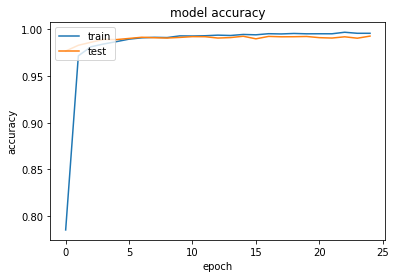

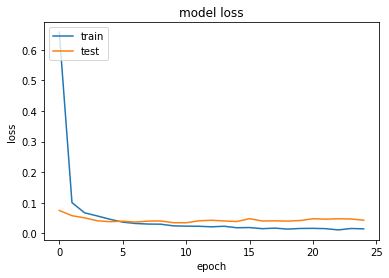

In [9]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
score = model.evaluate(X_test, y_test, verbose=1, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11776/12000 [============================>.] - ETA: 0sTest loss: 0.0431643224759
Test accuracy: 0.99275
